In [11]:
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline
file_in = "Fragaria_x_ananassa-Winter_Dawn_vs_fvesca_v1.1_pseudo.fna.LG1_50K.pileup"
file_clean = "Clean"
file_out = "Out_Realish3"
min_quality = 30

In [12]:
with open(file_in, 'r') as pileupIn, open(file_clean, 'w') as pileupClean:
    
    # This gets the first row for the while loop
    row = pileupIn.readline().split()
    while row:
        
        #Removes alignment scores from column 5
        row[4] = re.sub(r'(\$)|(\^.)', '', row[4])
        
        #Keeps only rows that do not contain +, - , *, > or < in column 5
        if re.search('.*[-+<>\*]\S*',row[4]) == None:
            pileupClean.write("\t".join(row)+"\n")
        
        # this gets the next row for the while loop to look at
        row = pileupIn.readline().split()
    

In [13]:
with open(file_clean, 'r') as pileupClean, open(file_out, 'w') as pileupOut:
    row = pileupClean.readline().split()
    while row:
        remaining_bases = []
        remaining_scores = []
        
        A_num = 0
        T_num = 0
        C_num = 0
        G_num = 0
        Total_num = 0
        
        for base, score in zip(row[4], row[5]):
            Numeric_Score = ord(score) - 33

            if Numeric_Score >= min_quality:
                remaining_bases.append(base)
                remaining_scores.append(score)
                
                if base == "g":
                    G_num += 1
                elif base == "G":
                    G_num += 1
                elif base == "c":
                    C_num += 1
                elif base == "C":
                    C_num += 1
                elif base == "a":
                    A_num += 1
                elif base == "A":
                    A_num += 1
                elif base == "t":
                    T_num += 1
                elif base == "T":
                    T_num += 1
                else:
                    pass
            Total_num += 1
                
        row[4] = "".join(remaining_bases)
        row[5] = "".join(remaining_scores)
        
        if Total_num >= 10:
            if G_num >= 3:
                new_row = "\t".join(row[0:3]) +  '\t' + "G"+ '\t' + str(G_num/Total_num) +"\n"
                pileupOut.write(new_row)
            if C_num >= 3:
                new_row = "\t".join(row[0:3]) +  '\t' + "C"+ '\t' + str(C_num/Total_num) +"\n"
                pileupOut.write(new_row)
            if A_num >= 3:
                new_row = "\t".join(row[0:3]) +  '\t' + "A"+ '\t' + str(A_num/Total_num) +"\n"
                pileupOut.write(new_row)          
            if T_num >= 3:
                new_row = "\t".join(row[0:3]) +  '\t' + "T"+ '\t' + str(T_num/Total_num) +"\n"
                pileupOut.write(new_row)
        row = pileupClean.readline().split()

In [4]:
df = pd.read_csv(file_out, sep="\t", header = None)
df.head()
df[4].head()

0    0.857143
1    0.888889
2    0.846154
3    0.961538
4    0.891892
Name: 4, dtype: float64

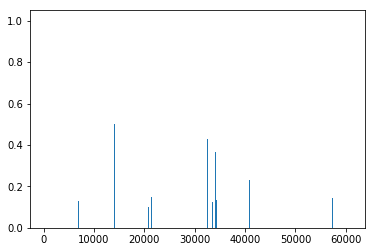

In [53]:
plt.bar(df[1], df[4])
plt.show()